In [1]:
from tfscreen.simulate.generate_phenotypes.lac_model import LacModel

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


### MWC dimer

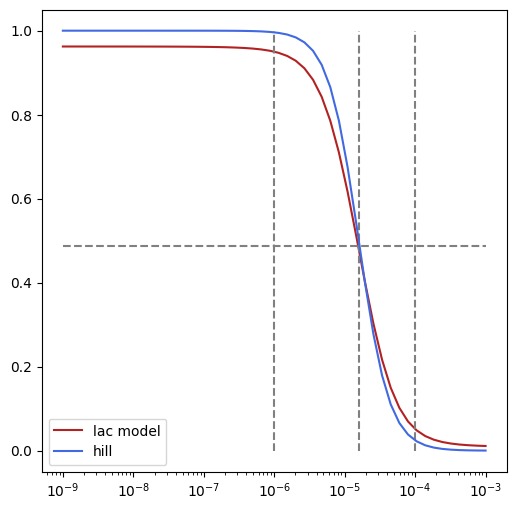

In [2]:
e_total = np.logspace(-9,-3)

K_hill = 0.015854e-3
n_hill = 2

model = LacModel("mwc_dimer",
                  wt_K_dict={
                      "K_h_l":0.4, #6.3,
                      "K_h_o":4.2e8,
                      "K_h_e":5.6e3, #5.6e4,
                      "K_l_o":0.1,
                      "K_l_e":7.6e5
                  },
                  r_total=3.3e-7, # 40 dimers per cell, 1.5 fL cell, 40% crowding
                  o_total=8.3e-8, # 20 plasmids, 1.5 fL cell, 40% crowding
                  e_total=e_total,
                  T=310,
                  R=0.001987)
obs = model.get_obs(np.zeros(len(model.species)))

fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(e_total,obs,color='firebrick',label="lac model")
ax.set_xscale('log')

lower = np.min(obs)
upper = np.max(obs)
middle = lower + (upper - lower)/2

ax.plot([K_hill,K_hill],[0,1],'--',color='gray')
ax.plot([1e-6,1e-6],[0,1],'--',color='gray')
ax.plot([1e-4,1e-4],[0,1],'--',color='gray')
ax.plot([np.min(e_total),np.max(e_total)],[middle,middle],'--',color='gray')
ax.plot(e_total,1-e_total**n_hill/(e_total**n_hill + K_hill**n_hill),color='royalblue',label="hill")
ax.legend()


### Microscopic dimer model

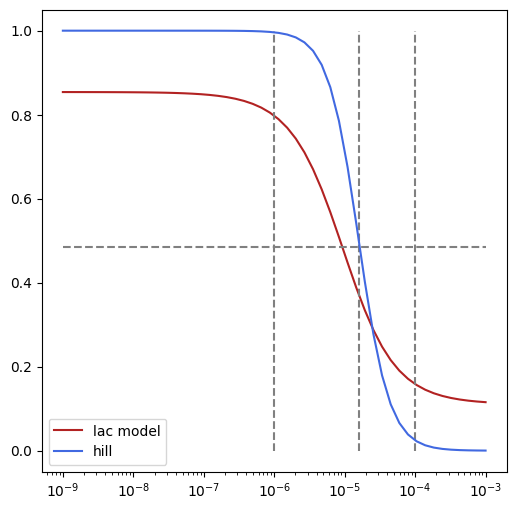

In [29]:
e_total = np.logspace(-9,-3)

K_hill = 0.015854e-3
n_hill = 2

model = LacModel("microscopic_dimer",
                  wt_K_dict={

                    # parameters derived from a fit to experimental data, then
                    # tweaked to incorporate unfolded state. 
                    "K_l_2u":2.46E-08,
                    "K_l_h":2.68E-07,
                    "K_l_o":1.00E-01,
                    "K_h_o":3.25E+14,
                    "K_l_e":7.36E+05,
                    "K_le_e":1.84E+05,
                    "K_h_e":7.06E+04,
                    "K_he_e":1.76E+04,
                    "K_lo_e":7.36E+04,
                    "K_loe_e":1.84E+0,
                    "K_ho_e":7.06E+04,
                    "K_hoe_e":1.76E+04,
                    "K_l_2u":4.35E-08,

                    # parameters derived from running the sochor model with 
                    # ~publication parameters. 
                    #"K_l_h":20, #2.50E+00,
                    #"K_l_o":1.83E-04,
                    #"K_h_o":1.20E+08, #4.20E+08,
                    #"K_l_e":1E+06, #7.60E+05,
                    #"K_le_e":1E+06, #7.60E+05,
                    #"K_h_e":5.60E+04, #5.60E+04,
                    #"K_he_e":5.60E+04, #5.60E+04,
                    #"K_lo_e":7.60e5, #7.60E+05,
                    #"K_loe_e":7.60E+05, #7.60E+05,
                    #"K_ho_e":1e4, #5.60E+04,
                    #"K_hoe_e":1e4, #5.60E+04
                  },
                  r_total=3.3e-7, # 40 dimers per cell, 1.5 fL cell, 40% crowding
                  o_total=8.3e-8, # 20 plasmids, 1.5 fL cell, 40% crowding
                  e_total=e_total,
                  T=310,
                  R=0.001987)
obs = model.get_obs(np.zeros(len(model.species)))

fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(e_total,obs,color='firebrick',label="lac model")
ax.set_xscale('log')

lower = np.min(obs)
upper = np.max(obs)
middle = lower + (upper - lower)/2

ax.plot([K_hill,K_hill],[0,1],'--',color='gray')
ax.plot([1e-6,1e-6],[0,1],'--',color='gray')
ax.plot([1e-4,1e-4],[0,1],'--',color='gray')
ax.plot([np.min(e_total),np.max(e_total)],[middle,middle],'--',color='gray')
ax.plot(e_total,1-e_total**n_hill/(e_total**n_hill + K_hill**n_hill),color='royalblue',label="hill")
ax.legend()


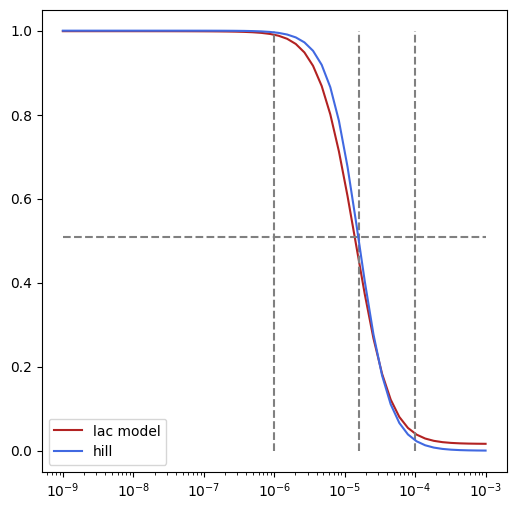

In [20]:
e_total = np.logspace(-9,-3)

K_hill = 0.015854e-3
n_hill = 2

model = LacModel("linkage_dimer",
                  wt_K_dict={
                      "Kd_e1":4e-7,   # 1st IPTG binding
                      "Kd_e2":4e-7,   # 2nd IPTG binding (assuming non-cooperative)
                      "Kd_o":1e-10,   # R binding to O (tight)
                      "Kd_oe1":1e-5,  # RE binding to O (weaker)
                      "Kd_oe2":1e-5,  # RE2 binding to O (weakest)
                  },
                  r_total=3.3e-7, # 40 dimers per cell, 1.5 fL cell, 40% crowding
                  o_total=8.3e-8, # 20 plasmids, 1.5 fL cell, 40% crowding
                  e_total=e_total,
                  T=310,
                  R=0.001987)
obs = model.get_obs(np.zeros(len(model.species)))

fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(e_total,obs,color='firebrick',label="lac model")
ax.set_xscale('log')

lower = np.min(obs)
upper = np.max(obs)
middle = lower + (upper - lower)/2

ax.plot([K_hill,K_hill],[0,1],'--',color='gray')
ax.plot([1e-6,1e-6],[0,1],'--',color='gray')
ax.plot([1e-4,1e-4],[0,1],'--',color='gray')
ax.plot([np.min(e_total),np.max(e_total)],[middle,middle],'--',color='gray')
ax.plot(e_total,1-e_total**n_hill/(e_total**n_hill + K_hill**n_hill),color='royalblue',label="hill")
ax.legend()